## Imports

In [47]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

## Funções


In [48]:
def renderPGM(img, axis='on'):
    """
    Renderiza uma imagem no formato PGM ou um array Numpy utilizando a biblioteca Pillow e exibe com Matplotlib.

    Parâmetros:
    -----------
    img : str ou np.array
        O caminho para o arquivo da imagem no formato PGM ou um array Numpy representando a imagem.
    
    axis : str, opcional
        Controla a exibição dos eixos da imagem. Pode ser 'on' para mostrar os eixos ou 'off' para ocultá-los.
        O valor padrão é 'on'.
    
    Funcionalidade:
    ---------------
    A função tenta carregar a imagem fornecida no formato PGM e renderiza-a em escala de cinza usando a
    função `imshow` da biblioteca Matplotlib. Se `axis` for definido como 'off', os eixos serão ocultados.
    Caso o input seja um array Numpy, a função renderiza diretamente o array como imagem.
    """
    try:
        # Carrega a imagem PGM
        imagem = Image.open(img)
       
        # Exibe a imagem
        plt.imshow(imagem, cmap='gray')
        plt.axis(axis)  # Oculta ou exibe os eixos conforme o parâmetro
        #plt.show()
        
    except:
        # Carrega a imagem de um array
        # Exibe a imagem
        plt.imshow(img, cmap='gray')
        plt.axis('on')  # Oculta ou exibe os eixos conforme o parâmetro
        #plt.show()


In [49]:
def apply_median_filter_1d(image_path, filter_size=9):
    """
    Aplica um filtro de mediana em uma imagem em escala de cinza, utilizando uma janela de vizinhança de tamanho especificado.

    Parâmetros:
    -----------
    image_path : str
        Caminho para o arquivo da imagem a ser processada.
    
    filter_size : int, opcional
        O tamanho da janela do filtro de mediana (deve ser um número ímpar). 
        O valor padrão é 9, o que significa que uma janela 9x9 será usada.

    Retorna:
    --------
    numpy.ndarray
        A imagem resultante após a aplicação do filtro de mediana. O tamanho e a dimensão da imagem são preservados, mas cada pixel 
        é substituído pela mediana de seus vizinhos, ajudando a remover ruídos enquanto preserva as bordas.

    Funcionalidade:
    ---------------
    1. Carrega a imagem a partir do caminho especificado e a converte para escala de cinza.
    2. Converte a imagem carregada em uma matriz NumPy para facilitar o processamento.
    3. Para cada pixel da imagem, coleta os valores dos vizinhos de acordo com o tamanho do filtro (`filter_size`).
    4. Calcula a mediana desses valores e substitui o valor do pixel original pela mediana.
    5. Retorna a imagem filtrada como um array NumPy.

    Exemplo de uso:
    ---------------
    output_image = apply_median_filter_1d('caminho/para/imagem.pgm', filter_size=9)
    """

    # Carregar a imagem a partir do caminho
    # Converte a imagem para escala de cinza 0 a 255
    image = Image.open(image_path).convert('L')
    
    # Converte a imagem em uma matriz NumPy
    image_np = np.array(image)
    
    # Tupla resultado da matriz Numpy
    altura, largura = image_np.shape

    #Cria uma cópia da imagem
    output_image = image_np.copy()

    # Percorre todos os pixels
    for i in range(altura):
        for j in range(largura):
            # Define os limites da vizinhança pelo pixel central
            # Define o tamanho da vizinhança pelo filter_size , padrão 9
            vizinhos = []
            for di in range(-filter_size//2, filter_size//2 + 1):
                for dj in range(-filter_size//2, filter_size//2 + 1):
                    ni, nj = i + di, j + dj
                    
                    # Verifica se o deslocamento da imagem está dentro da mesma
                    # Adiciona os pixeis encontrados em um array vizinhos
                    if 0 <= ni < altura and 0 <= nj < largura:
                        vizinhos.append(image_np[ni, nj])
            
            # Ordena e pega a mediana
            output_image[i, j] = np.median(vizinhos)
    
    return output_image

In [50]:
def plot_single_image_median_filter(results): 

    """"
    Plota as imagens originais e filtradas por mediana lado a lado.

    Parâmetros:
    -----------
    results : dict
        Um dicionário contendo as seguintes chaves:
        - 'ImagemOriginal': Uma lista de caminhos de arquivos ou arrays representando as imagens originais.
        - 'ImagemFiltrada': Uma lista de arrays ou caminhos de arquivos representando as imagens após a aplicação do filtro mediano.
        - 'TituloOriginal': Uma lista com os títulos para as imagens originais.
        - 'TituloFiltrada': Uma lista com os títulos para as imagens filtradas.
    
    Funcionalidade:
    ---------------
    Para cada imagem no dicionário `results`, a função exibe a imagem original e sua versão filtrada lado a lado.
    Os títulos correspondentes a cada imagem são exibidos acima dos respectivos gráficos.
    A função utiliza `renderPGM` para renderizar tanto as imagens originais quanto as filtradas, e exibe as imagens 
    usando a biblioteca `matplotlib`.

    Exibição:
    --------
    A função plota as imagens em dois subplots (1 linha, 2 colunas):
    - À esquerda: A imagem original.
    - À direita: A imagem filtrada por mediana.
    """

    print(f'Plotar um arquivo por imagem:')
    for index,img in enumerate(results['ImagemOriginal']):
        files = len(results['ImagemOriginal'])
        
        print(f'Plotando o arquivo {index+1} de {files}')
        #Plota a imagem original
        plt.subplot(1,2,1)
        plt.title(results['TituloOriginal'][index])
        renderPGM(results['ImagemOriginal'][index])

        #Plot a imagem Filtrada
        plt.subplot(1,2,2)
        plt.title(results['TituloFiltrada'][index])
        renderPGM(results['ImagemFiltrada'][index])

        plt.show()
    

In [51]:
def plot_all_image_median_filter(results,figx=10,figy=10):   
    """
    Plota todas as imagens originais e filtradas por mediana em um layout de grade.

    Parâmetros:
    -----------
    results : dict
        Um dicionário contendo as seguintes chaves:
        - 'ImagemOriginal': Uma lista de caminhos de arquivos ou arrays representando as imagens originais.
        - 'ImagemFiltrada': Uma lista de arrays ou caminhos de arquivos representando as imagens após a aplicação do filtro mediano.
        - 'TituloOriginal': Uma lista com os títulos para as imagens originais.
        - 'TituloFiltrada': Uma lista com os títulos para as imagens filtradas.
    
    figx : float
        Largura da figura para o layout do gráfico, em polegadas.
    
    figy : float
        Altura da figura para o layout do gráfico, em polegadas.

    Funcionalidade:
    ---------------
    Para cada imagem no dicionário `results`, a função exibe a imagem original e a versão filtrada em uma grade.
    Cada par de imagens (original e filtrada) é exibido em uma linha com duas colunas. O título de cada imagem 
    é exibido acima dos gráficos correspondentes. O tamanho da figura é ajustado com base nos parâmetros `figx` e `figy`.

    Exibição:
    --------
    A função cria uma figura com várias subplots:
    - Em cada linha, a imagem original é exibida na primeira coluna, e a imagem filtrada por mediana é exibida na segunda.
    - O layout das subplots é ajustado automaticamente com `plt.tight_layout()` para evitar sobreposição.
    """
    print(f'Plotar em uma unica imagem:')
    plt.figure(figsize=(figx, figy))
    for index,img in enumerate(results['ImagemOriginal']):
        nrows = len(results['ImagemOriginal'])

        print(f'Plotando o arquivo {index+1} de {nrows}')
        nindexOriginal = 2 * index + 1
        nindexFiltered = 2 * index + 2
        
        #Plota a imagem original
        plt.subplot(nrows,2,nindexOriginal)
        plt.title(results['TituloOriginal'][index])
        renderPGM(results['ImagemOriginal'][index])

        #Plot a imagem Filtrada
        plt.subplot(nrows,2,nindexFiltered)
        plt.title(results['TituloFiltrada'][index])
        renderPGM(results['ImagemFiltrada'][index])
        
    plt.tight_layout()
    plt.show()

In [52]:
def process_images_with_median_filter(paramMedian):
    """
    Processa um conjunto de imagens aplicando um filtro de mediana e retorna os resultados.

    Parâmetros:
    -----------
    paramMedian : int
        O tamanho da janela do filtro de mediana (número de vizinhos) a ser aplicado nas imagens.

    Funcionalidade:
    ---------------
    A função percorre todos os arquivos da pasta 'pgm', aplica o filtro de mediana a cada imagem e armazena 
    tanto a imagem original quanto a imagem filtrada. Para cada imagem, também armazena os títulos correspondentes, 
    indicando se a imagem é original ou filtrada. O filtro de mediana é aplicado usando a função `apply_median_filter_1d`.

    Retorno:
    --------
    dict
        Um dicionário contendo:
        - 'ImagemOriginal': Lista de caminhos de arquivos ou arrays representando as imagens originais.
        - 'ImagemFiltrada': Lista de arrays ou caminhos de arquivos representando as imagens após a aplicação do filtro mediano.
        - 'TituloOriginal': Lista de títulos para as imagens originais (sem filtro).
        - 'TituloFiltrada': Lista de títulos para as imagens filtradas, incluindo o tamanho do filtro aplicado.
    """

    results = {'ImagemOriginal':[],
            'ImagemFiltrada':[],
            'TituloOriginal':[],
            'TituloFiltrada':[]}

    for file in os.listdir('pgm'):
        fileToFilter = 'pgm/' + file
        print(f'Aplicando o Filtro de Mediana Size={paramMedian} ao arquivo {fileToFilter}')
        imagemFiltered = apply_median_filter_1d(fileToFilter,paramMedian)

        
        #Imagem Original
        results['TituloOriginal'].append(f'Imagem Original\nNo filter')
        results['ImagemOriginal'].append(fileToFilter)

        #Imagem Filtrada
        results['TituloFiltrada'].append(f'Imagem Filtrada\nFilter Size = {paramMedian}')
        results['ImagemFiltrada'].append(imagemFiltered)
        
    return results

## Programa

In [53]:
#Valor int tamanho do filtro de medianas , caso seja null sera aplicado o valor de 9
imgstratadas = process_images_with_median_filter(3)

Aplicando o Filtro de Mediana Size=3 ao arquivo pgm/cameraman.pgm
Aplicando o Filtro de Mediana Size=3 ao arquivo pgm/einstein.pgm
Aplicando o Filtro de Mediana Size=3 ao arquivo pgm/kid.pgm


Plotar em uma unica imagem:
Plotando o arquivo 1 de 3
Plotando o arquivo 2 de 3
Plotando o arquivo 3 de 3


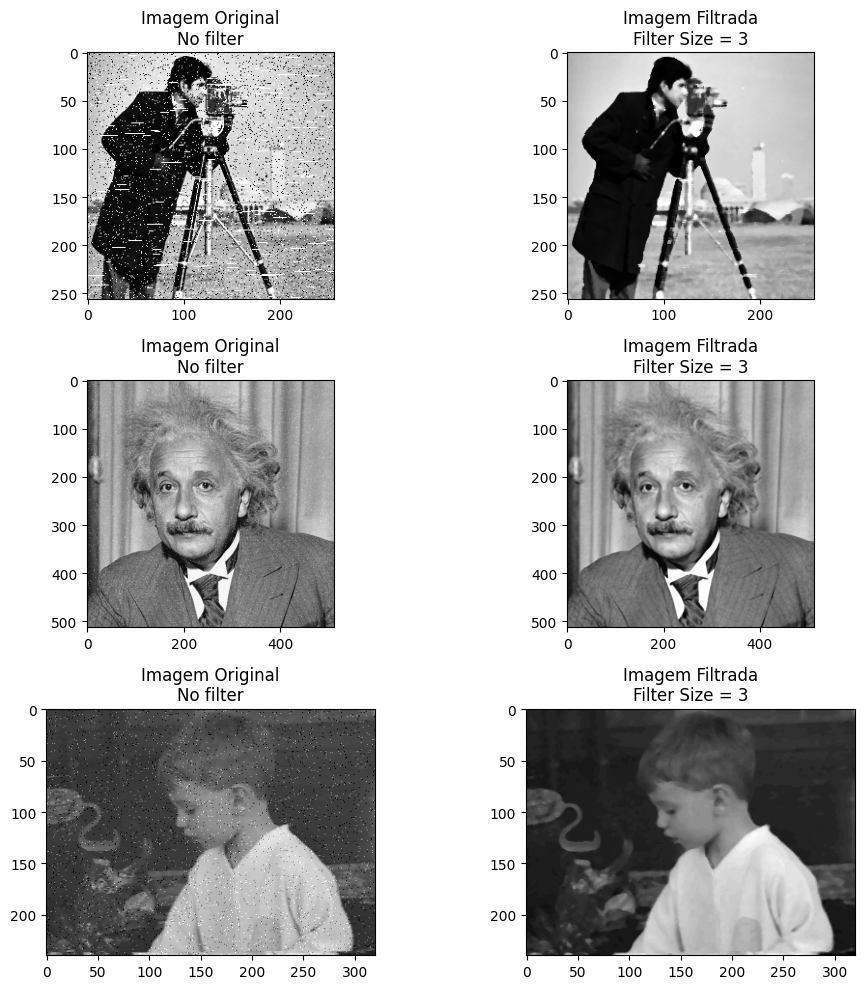

In [54]:
# Plot das imagens em uma unica imagem
# Define o tamanho geral da imagem em polegadas (default:10x10)
plot_all_image_median_filter(imgstratadas,10,10)

Plotar um arquivo por imagem:
Plotando o arquivo 1 de 3


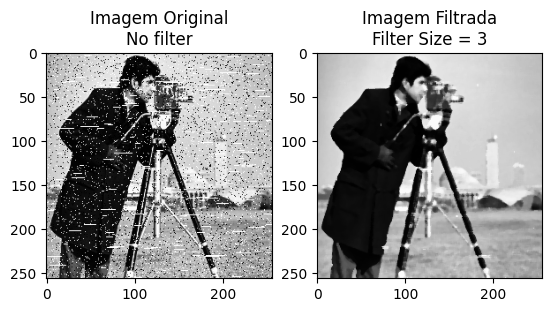

Plotando o arquivo 2 de 3


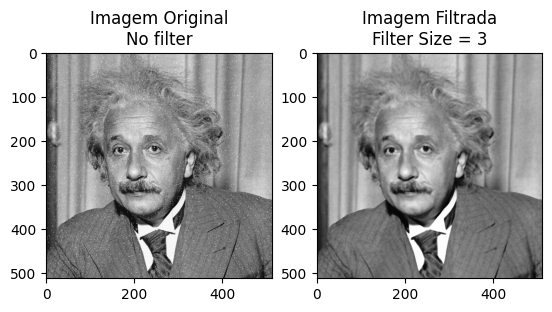

Plotando o arquivo 3 de 3


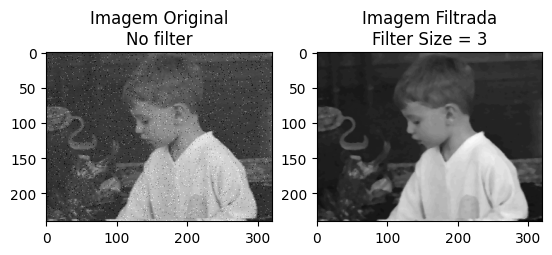

In [55]:
# Plot das imagens unicos
plot_single_image_median_filter(imgstratadas)